# The homework of module 10: aproximatly for solve the line system

In [1]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)

## exercise 1
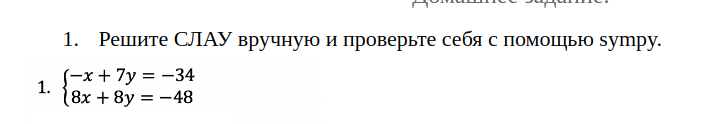

In [2]:
# solve manually the SLAE and check with hep to sympy 

In [3]:
x, y = symbols('x, y')

A = Matrix([[-1, 7], [8, 8]])
a = Matrix([x, y])
b = Matrix([-34, -48])

In [4]:
SLAE_1 = A*a - b
SLAE_1

[-x + 7*y + 34 ]
[              ]
[8*x + 8*y + 48]

In [5]:
linsolve(SLAE_1, [x, y])

## exercise 2
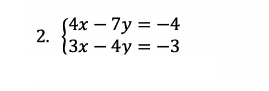

In [6]:
A = Matrix([[4, 7], [3, -4]])
a = Matrix([x, y])
b = Matrix([-4, -3])

In [7]:
SLAE_2 = A*a - b
SLAE_2

[4*x + 7*y + 4]
[             ]
[3*x - 4*y + 3]

In [8]:
linsolve(SLAE_2, [x, y])

## exercise 3
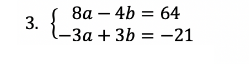

In [9]:
A = Matrix([[8, -4], [-3, 3]])
a, b = symbols('a, b')
c = Matrix([a, b])
d = Matrix([64, -21])

In [10]:
SLAE_3 = A * c - d 
SLAE_3

[8*a - 4*b - 64 ]
[               ]
[-3*a + 3*b + 21]

In [11]:
linsolve(SLAE_3, [a, b])

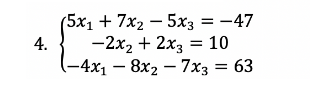

In [12]:
A = Matrix([[5, 7, -5], [0, -2, 2], [-4, -8, -7]])
x1, x2, x3 = symbols('x1, x2, x3')
a = Matrix([x1, x2, x3])
b = Matrix([-47, 10, 63])

In [13]:
SLAE_4 = A*a - b
SLAE_4

[5*x1 + 7*x2 - 5*x3 + 47 ]
[                        ]
[   -2*x2 + 2*x3 - 10    ]
[                        ]
[-4*x1 - 8*x2 - 7*x3 - 63]

In [14]:
(-188 + 315) / 5

In [15]:
linsolve(SLAE_4, [x1, x2, x3])

In [16]:
x2 = x3 - 5

In [17]:
5*x1 + 7*x2 - 5*x3 + 47

In [18]:
-4*x1 - 8*(x3 - 5) - 7*x3 - 63

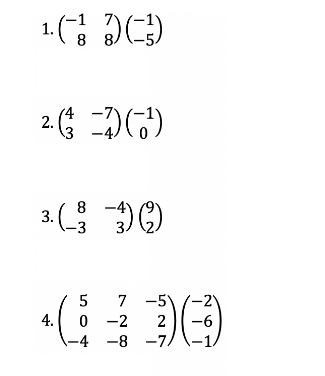

In [19]:
# multiply matrix by vector and check you
# first equation
Matrix([[-1, 7], [8, 8]]) * Matrix([-1, -5])

[-34]
[   ]
[-48]

In [20]:
# second equation
Matrix([[4, -7], [3, -4]]) * Matrix([-1, 0])

[-4]
[  ]
[-3]

In [21]:
# thirth equation
Matrix([[8, -4], [-3, 3]]) * Matrix([9, 2])

[64 ]
[   ]
[-21]

In [22]:
# forth equation
Matrix([[5, 7, -5], [0, -2, 2], [-4, -8, -7]]) * Matrix([-2, -6, -1])

[-47]
[   ]
[10 ]
[   ]
[63 ]

Achieve MSE <55
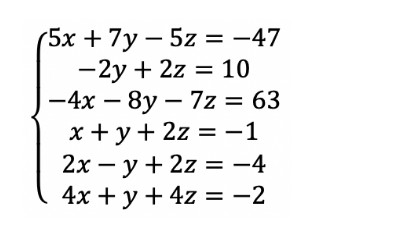

In [26]:
x, y, z = symbols('x, y, z')
MSE = 1/6 * (
(5*x + 7*y - 5*z + 47)**2 + \
(0*x + -2*y + 2*z - 10)**2 + \
(-4*x + -8*y - 7*z - 63)**2 + \
(1*x + 1*y + 2*z + 1)**2 + \
(2*x + -1*y + 2*z + 4)**2 + \
(4*x + 1*y + 4*z + 2)**2
)
MSE

In [29]:
MSEx = diff(MSE, x)
MSEx

In [30]:
MSEy = diff(MSE, y)
MSEy

In [31]:
MSEz = diff(MSE, z)
MSEz

In [37]:
MSE.subs({x:0, y:0, z:0})

Do iteration for searching is 1 anti gradient
gr: [-1.68000000000000 -2.84000000000000 -0.680000000000000]
MSE 1: 247.497333333333
Do iteration for searching is 2 anti gradient
gr: [-2.29346666666667 -4.10440000000000 -0.790000000000000]
MSE 2: 104.486005072593
Do iteration for searching is 3 anti gradient
gr: [-2.47595688888889 -4.71219777777778 -0.722969777777778]
MSE 3: 73.7744351503798
Do iteration for searching is 4 anti gradient
gr: [-2.48449883555556 -5.03898750814815 -0.620976468148148]
MSE 4: 64.1857120851198
Do iteration for searching is 5 anti gradient
gr: [-2.42352395196049 -5.24020775715556 -0.530073773777778]
MSE 5: 59.5591801838142
Do iteration for searching is 6 anti gradient
gr: [-2.33577437740421 -5.38153056800477 -0.461073818362404]
MSE 6: 56.5686545495930
Do iteration for searching is 7 anti gradient
gr: [-2.23893438867603 -5.49162915212318 -0.412953715575168]
MSE 7: 54.3188045027199


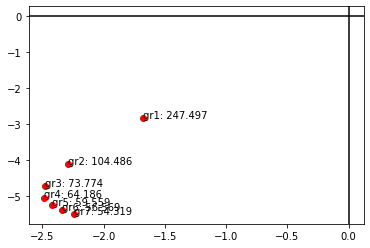

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def find_gradient_n(coeff, type_gradient='P', step=1/100):
    gradient = np.array([MSEx.subs({x: coeff[0], y: coeff[1], z: coeff[2]}),
                           MSEy.subs({x: coeff[0], y: coeff[1], z: coeff[2]}),
                        MSEz.subs({x: coeff[0], y: coeff[1], z: coeff[2]})]) * step
    if type_gradient == 'P':
        return coeff + gradient
    elif type_gradient == 'N':
        return coeff + -gradient
    else:
        raise Exception('Not fount type gradient. Function get variable type gradient such as the P or N')
        

fig, ax = plt.subplots()
ax.axhline(0, color='black')
ax.axvline(0, color='black')

last_gr = np.array([0, 0, 0])
for i in range(10):
    print(f'Do iteration for searching is {i+1} anti gradient')
    gr = find_gradient_n((last_gr), 'N', 1/100)
    ax.scatter(gr[0], gr[1], c='r')
    mse_gr = MSE.subs({x:gr[0], y:gr[1], z:gr[2]})
    print(f'gr: {gr}')
    print(f'MSE {i+1}: {mse_gr}')
    ax.annotate(f'gr{i+1}: {format(mse_gr, ".3f")}', (gr[0], gr[1]))
    last_gr = gr
    if mse_gr < 55:
        break